In [2]:
import numpy as np

# NumPy ufuncs

ufuncs stands for "universal functions". They are `numpy` functions that can be used on `ndarray`.\
Important for "vectorization" a function, but not for performance. 

If you want to pay special care on the peroformance, you need to know the C-extension for python.\
REF: https://numpy.org/doc/stable/user/c-info.how-to-extend.html 

## Vectorization

Converting iterative statements into a vector based operation is called vectorization.

For example, we have deomonstrated that if we want to add the elements of two python lists:

In [3]:
list1 = [1,2,3,4,5]
list2 = [4,5,6,7,8]
list3 = []
for v1,v2 in zip(list1, list2):
    list3.append(v1+v2)

print(list3)

[5, 7, 9, 11, 13]


In [4]:
# or define a func to do it
def pyadd(list1,list2):
    res = []
    for v1,v2 in zip(list1,list2):
        res.append(v1+v2)
    return res

list3 = pyadd(list1,list2)
print(list3)

[5, 7, 9, 11, 13]


In [5]:
# or by a simplier way:
list3 = [v1+v2 for v1,v2 in zip(list1,list2)]
print(list3)

[5, 7, 9, 11, 13]


We have shown that it would be much better to use numpy arrays.

In [6]:
list1 = np.array([1,2,3,4,5])
list2 = np.array([4,5,6,7,8])
list3 = list1 + list2
print(list3)

[ 5  7  9 11 13]


we could also use `np.add()` to do the calculations

In [7]:
list3 = np.add(list1,list2)
print(list3)

[ 5  7  9 11 13]


In the above example, `np.add()` is a vectorized function.\
Or, `np.add()` is a numpy ufunc.

### User-defined ufunc

Of course, `np.add()` is a too simple ufunc and we usually prefer using `list1+list2`.\
However, it is natural that you might want to write your own ufunc to do more compliate calculations.\

To implment your own numpy ufunc, you could use the `np.frompyfunc()` method.

The `np.frompyfunc()` method takes the following arguments:
1. `function` : the "name" of the function.
2. `inputs` : the "number "of the input arrays.
3. `outputs` : the "number" of the output arrays. 

In [8]:
# Example

def my_add(x,y):
    return x+y

my_npadd = np.frompyfunc(my_add,2,1) 

In [9]:
list1 = np.array([1,2,3,4,5])
list2 = np.array([4,5,6,7,8])
list3 = my_npadd(list1,list2)
print(list3)

[5 7 9 11 13]


### User-defined vfunc

Alternatively, we could use `np.vectorize()` to vectorize a python function.\
Note that `np.vectorize()` is designed for convenience not for performance.

In [10]:
my_npvadd = np.vectorize(my_npadd)

In [11]:
list3 = my_npvadd(list1,list2)
print(list3)

[ 5  7  9 11 13]


How about the performance?

In [12]:
# preparing the list
N = 1_000_000
py_list1 = [x for x in range(N)]
py_list2 = [2.0*x for x in range(N)]
np_list1 = np.arange(N)
np_list2 = 2.0 * np.arange(N)

In [13]:
# use python list [90 ms]
%timeit list3 = pyadd(py_list1,py_list2)

90 ms ± 1.01 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [14]:
# use np.add() [2.79 ms]
%timeit list3 = np.add(np_list1,np_list2)

2.62 ms ± 227 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [17]:
# use my_npadd(), user-defined ufunc [116 ms]
%timeit list3 = my_npadd(np_list1,np_list2)

116 ms ± 429 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [18]:
# use my_npvadd(), user-defined vfunc [1520 ms]
%timeit list3 = my_npvadd(np_list1,np_list2)

1.52 s ± 8.23 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Exercise 1. Fermi distribution

Note: you might need to install the "LaTex Workshop" extension in the VS Code.

The Fermi-Dirac distribution has the form:

$\begin{equation}
f(E) = \frac{1}{\exp{(E-E_F)/kT}+1},
\end{equation}$

where $E$ is the energy, $k$ is the Boltzmann constant, $T$ is the temperature, and $E_F$ is the Fermi energy.
1. Use (1) `np.frompyfunc()` and (2) `np.vectorize()` to create a vectorize function `fermi` that takes three input arguments (E,Ef,T).
2. Create a numpy array that contains 300 energy bins evenly on log scale between 3 to 300 MeV.
3. Use the vecotrized function to calculate the Fermi-Dirac distribution with (1) Ef = 5 MeV, T = 10 MeV, (2) Ef = 30 MeV, T = 10 MeV, (3) Ef = 5 MeV, T = 100 MeV, and (4) Ef = 30MeV, T = 100 MeV.
4. Use the below `matplotlib` code to visualize the Fermi-Dirac distribution.   

In [44]:
# TODO













Text(0, 0.5, 'f(E)')

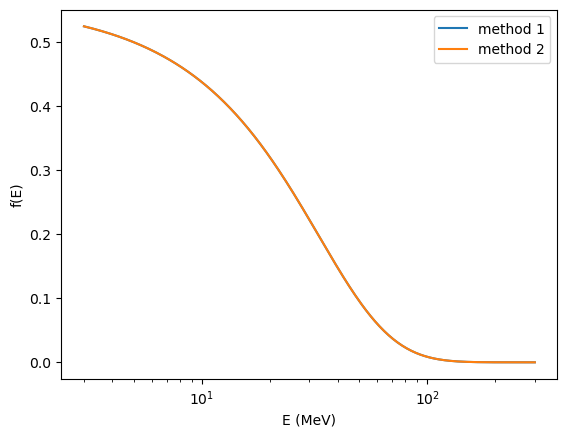

In [43]:
# Display your fermi distribution function
import matplotlib.pyplot as plt
plt.figure(1)
plt.plot(E,fE1,label="Ef =  5, T = 10 ") # TODO:  modify the name of input np.arrays here
plt.plot(E,fE2,label="Ef = 30, T = 10 ") 
plt.plot(E,fE3,label="Ef =  5, T = 100")
plt.plot(E,fE4,label="Ef = 30, T = 100")

plt.legend(loc="best")
plt.xscale('log')
plt.xlabel("E (MeV)")
plt.ylabel("f(E)")


From the above example, we could see that `np.add()` is the fastest one,\ 
and `np.frompyfunc()` and `np.vectorize()` don't gain any speedup.

The eact perfromance depends on the length of an numpy array.\ 
Below we show a better performance comparision with the package `perfplot`. 

Output()

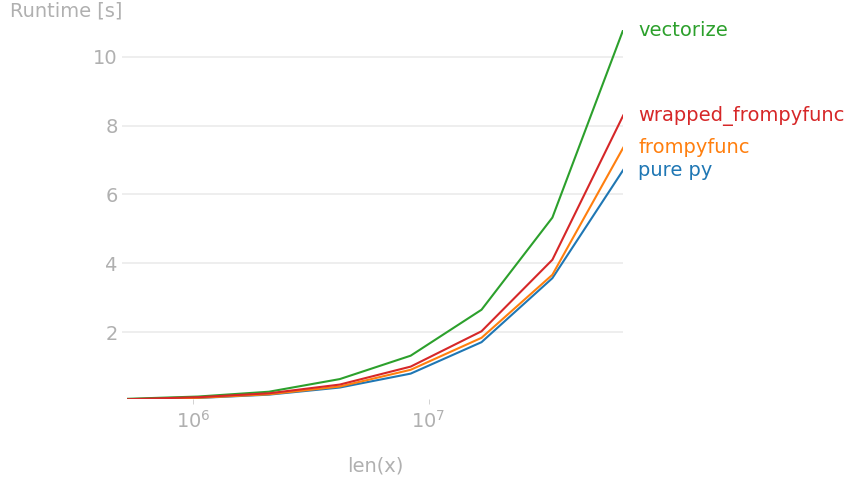

In [19]:
# a better performance analysis in stackoverflow
# ref: https://stackoverflow.com/questions/57253839/why-vectorize-is-outperformed-by-frompyfunc
# you might need to `conda install perplot` to install perfplot

import numpy as np
import perfplot

# a simple function to double each element
def do_double(x):
    return 2.0*x

# a pure python function to do this
def py_do_double(list1):
    return [2.0*x for x in list1]

# use np.vectorize
vectorize = np.vectorize(do_double)

# use np.frompyfunc
frompyfunc = np.frompyfunc(do_double, 1, 1)

# use wrapped_frompyfunc to keep the same dtype
def wrapped_frompyfunc(arr):
    return frompyfunc(arr).astype(np.float64)

# measure the performance
perfplot.show(
    setup=lambda n: np.linspace(0, 1, n),
    n_range=[2**k for k in range(19,27)],
    kernels=[
        py_do_double,
        frompyfunc, 
        vectorize, 
        wrapped_frompyfunc,
        ],
    labels=["pure py","frompyfunc", "vectorize", "wrapped_frompyfunc"],
    logx=True,
    logy=False,
    xlabel='len(x)',
    equality_check = None,  
    )

The reason that `np.add()`, which is also a python ufunc, is very fast becasue it uses C in its kernal.

In later lectures, we will learn how to use `numba` to improve the performance.

### (Optional) Improve the vectorization with `numba`

In [22]:
# Example
from numba import jit, vectorize

@vectorize
def numba_add(x,y):
    return x+y

list3 = numba_add(list1,list2)
print(list3)

[ 5  7  9 11 13]


In [26]:
# use numba [2.29 ms]
%timeit list3 = numba_add(np_list1,np_list2)

2.18 ms ± 93.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


You could see that we could outperform the `np.add()` with `numba`.

In [29]:
# Method 2
@jit
def numba_add2(list1,list2):
    list3 = []
    for v1,v2 in zip(list1, list2):
        list3.append(v1+v2)
    return list3


In [30]:
# use numba jit [20.6 ms] 
%timeit numba_add2(np_list1,np_list2)

20.6 ms ± 1.04 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


Output()

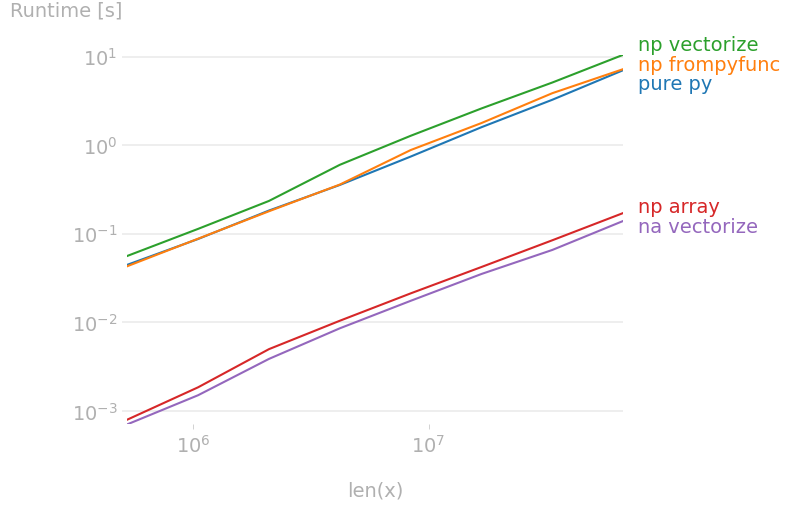

In [33]:
import numpy as np
from numba import vectorize
import perfplot

# a simple function to double each element
def do_double(x):
    return 2.0*x

# a pure python function to do this
def py_do_double(list1):
    return [2.0*x for x in list1]

# use numba vectorize
@vectorize
def na_do_double(x):
    return 2.0*x

# use np.array * 2
def np_do_double(list1):
    return 2.0*np.array(list1)

# use np.vectorize
np_vectorize = np.vectorize(do_double)

# use np.frompyfunc
frompyfunc = np.frompyfunc(do_double, 1, 1)

# measure the performance
perfplot.show(
    setup=lambda n: np.linspace(0, 1, n),
    n_range=[2**k for k in range(19,27)],
    kernels=[
        py_do_double,
        frompyfunc, 
        np_vectorize,
        np_do_double, 
        na_do_double,
        ],
    labels=["pure py","np frompyfunc", "np vectorize", "np array", "na vectorize"],
    logx=True,
    logy=True,
    xlabel='len(x)',
    equality_check = None,  
    )